# The Power of Plots - Pyber

### Three observation based on belowe data:
#### Observation 1: There is a larger difference in average fare in Rural and Subarban cities compared to the same in Urban cities.
#### Observation 2: There is direct co-relation between number of rides and total fare revenue, higher the number of rides higher the amount of total fare collected.
#### Observation 3: There is direct co-relation between number of rides and number of drivers, higher the number of rides higher leades to high amount of drivers.

In [762]:
## Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import linregress
from pylab import rcParams
rcParams['figure.figsize'] = 6,5


In [749]:
# Open and read files
city = pd.read_csv("raw_data/city_data.csv")
ride = pd.read_csv("raw_data/ride_data.csv")

In [750]:
# retrive and conver in to dataframe (city_data.csv)
city = pd.DataFrame(city)
city.head(10)

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban
5,South Josephville,4,Urban
6,West Sydneyhaven,70,Urban
7,Travisville,37,Urban
8,Torresshire,70,Urban
9,Lisaville,66,Urban


In [751]:
# retrive and conver in to dataframe (ride_data.csv)
ride = pd.DataFrame(ride)
ride.head(10)

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673
5,New Jeffrey,2016-02-22 18:36:25,36.01,9757888452346
6,Port Johnstad,2016-06-07 02:39:58,17.15,4352278259335
7,Jacobfort,2016-09-20 20:58:37,22.98,1500221409082
8,Travisville,2016-01-15 17:32:02,27.39,850152768361
9,Sandymouth,2016-11-16 07:27:00,21.61,2389035050524


### Average fare by per city

In [824]:
# merge two dataframe by cities and get average fare per city.
df = pd.merge(city, ride, on='city', how='left')

df = df.groupby(['city', "type"])
df = pd.DataFrame(round(df.mean(),2))

df = df.reset_index()

df.head()


,city,type,driver_count,fare,ride_id
0,Alvarezhaven,Urban,21.0,23.93,5.351586e+12
1,Alyssaberg,Urban,67.0,20.61,3.536678e+12
2,Anitamouth,Suburban,16.0,37.32,4.195870e+12
3,Antoniomouth,Urban,21.0,23.62,5.086800e+12
4,Aprilchester,Urban,49.0,21.98,4.574788e+12


### Number of rides in per city 

In [754]:
# Find out total number of rides per city
city_count = ride.copy()

city_count = city_count.groupby('city')['ride_id'].count()
city_count = pd.DataFrame(city_count)

city_count = city_count.reset_index()
city_count = city_count.rename(columns={'ride_id':'Total number of rides'})
city_count.head()


,city,Total number of rides
0,Alvarezhaven,31
1,Alyssaberg,26
2,Anitamouth,9
3,Antoniomouth,22
4,Aprilchester,19


In [826]:
# create a final dataframe which contain city type, total number of rides, total drivers and average fare per city.
df = pd.merge(df,city_count, on='city')

df = df.loc[:,['city', 'type', 'Total number of rides', 'driver_count', 'fare',]]

df = pd.DataFrame(df)
df.rename(columns={'city':'City',
                   'type':'Types',
                   'fare':'Average fare',
                   'driver_count':'Total drivers'
                  })


,City,Types,Total number of rides,Total drivers,Average fare
0,Alvarezhaven,Urban,31,21.0,23.93
1,Alyssaberg,Urban,26,67.0,20.61
2,Anitamouth,Suburban,9,16.0,37.32
3,Antoniomouth,Urban,22,21.0,23.62
4,Aprilchester,Urban,19,49.0,21.98
5,Arnoldview,Urban,31,41.0,25.11
6,Campbellport,Suburban,15,26.0,33.71
7,Carrollbury,Suburban,10,4.0,36.61
8,Carrollfort,Urban,29,55.0,25.40
9,Clarkstad,Suburban,12,21.0,31.05


In [839]:
# create scatter plot: X axis: Total number of rides per city, Y axis: Average fares and city type plotted

u = df.type.str.count(r'Urban')
s = df.type.str.count(r'Suburban')
r = df.type.str.count(r'Rural')



x = (df['Total number of rides'] * u) 
y = (df['fare'] * u)

plt.scatter(x, y, alpha=0.7, c='lightcoral', edgecolors='coral', s = df['driver_count']*10, label="Urban", linewidths=2)


x = (df['Total number of rides'] * s)
y = (df['fare'] * s)

plt.scatter(x, y, alpha=0.7, c='lightskyblue', edgecolors='skyblue', s = df['driver_count']*10, label='Suburban', linewidths=2)


x = (df['Total number of rides'] * r)
y = (df['fare'] * r)

plt.scatter(x, y, alpha=0.7, c='gold', edgecolors='orange', s = df['driver_count']*10, label='Rural', linewidths=2)



### Bubble plot of Pyber ride sharing data 2016 by average fare and total number of rides based on city types

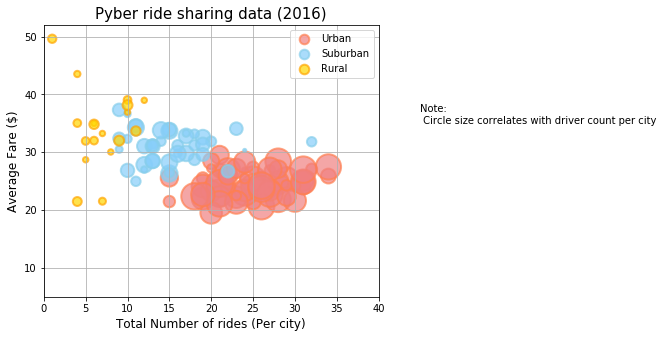

In [840]:
# circle size corelated with driver count per city
# ploting graph

plt.ylim(5, 52)
plt.xlim(0, 40)
plt.ylabel('Average Fare ($)', fontsize = 12)
plt.xlabel('Total Number of rides (Per city)', fontsize = 12)
plt.title("Pyber ride sharing data (2016)", fontsize = 15)
plt.grid()
plt.legend(loc="upper right", scatterpoints=1, fontsize=10, markerscale=0.5)
note = ("Note:\n Circle size correlates with driver count per city")
plt.text(45,35,note)
plt.show()

## % of Total Fares by City Type  

In [765]:
# created dataframe which contain total fare by city type and found % of total fare
df1 = pd.merge(city, ride, on='city')
df1 = df1.groupby('type')['fare'].sum()
df1 = pd.DataFrame(df1)
df1['% of total fare'] = df1['fare']/df1['fare'].sum()*100
df1 = df1.reset_index()
df1

,type,fare,% of total fare
0,Rural,4255.09,6.579786
1,Suburban,20335.69,31.445750
2,Urban,40078.34,61.974463


## Pie chart of % of Total Fares by City Type

In [851]:
# Pie chart
types = df1['type']
total_fare = df1['% of total fare'] # Data which we want to show as a pie chart
colors = ["gold", "lightcoral", "lightskyblue"]
explode = (0, 0, 0.05)
plt.pie(total_fare, explode=explode, labels=types, colors=colors, autopct="%1.1f%%", shadow=True, startangle=50)

([<matplotlib.patches.Wedge at 0x1a825b9e588>,
  <matplotlib.text.Text at 0x1a825bc0a90>])

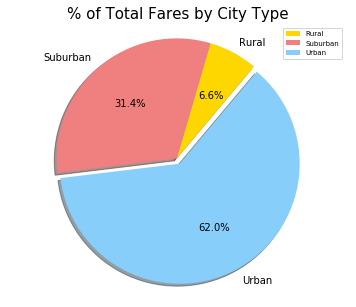

In [852]:
#Plotted pie chart based on city type and % of total fares by city 
plt.title('% of Total Fares by City Type', fontsize=15)
plt.legend(loc="upper right", scatterpoints=1, fontsize=7)
plt.axis("equal")
plt.show()

## % of Total Rides by City Type

In [845]:
# created dataframe which contain total number of rides and % of total rides per city type
df2 = df.groupby('type')['Total number of rides'].sum()

df2 = pd.DataFrame(df2)

df2 = df2.reset_index()
df2['% of total rides'] = df2['Total number of rides']/df2['Total number of rides'].sum()* 100
df2

,type,Total number of rides,% of total rides
0,Rural,125,5.263158
1,Suburban,625,26.315789
2,Urban,1625,68.421053


## Pie chart of  % of Total Rides by City Type

In [853]:
types = df2['type']
total_rides = df2['% of total rides'] # Data which we want to show as a pie chart
colors = ["gold", "lightcoral", "lightskyblue"]
explode = (0, 0, 0.05)
plt.pie(total_rides, explode=explode, labels=types, colors=colors, autopct="%1.1f%%", shadow=True, startangle=50)

([<matplotlib.patches.Wedge at 0x1a825c48550>,
  <matplotlib.text.Text at 0x1a825c6ca58>])

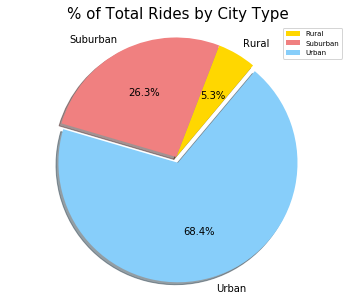

In [854]:
#Plotted pie chart based on type of city and % of total rides
plt.title('% of Total Rides by City Type', fontsize=15)
plt.legend(loc="upper right", scatterpoints=1, fontsize=7)
plt.axis("equal")
plt.show()

## % of Total Drivers by City Type

In [848]:
# created dataframe which contain total driver counts and % of total drivers based on city type
df3 = df.groupby('type')['driver_count'].sum()
df3 = pd.DataFrame(df3)
df3 = df3.reset_index()
df3['% of total drivers'] = df3['driver_count']/df3['driver_count'].sum()* 100
df3

,type,driver_count,% of total drivers
0,Rural,104.0,3.113772
1,Suburban,629.0,18.832335
2,Urban,2607.0,78.053892


## Pie chart of  % of Total Drivers by City Type

In [856]:
types = df3['type']
total_drivers = df3['% of total drivers'] # Data which we want to show as a pie chart
colors = ["gold", "lightcoral", "lightskyblue"]
explode = (0, 0, 0.08)
plt.pie(total_drivers, explode=explode, labels=types, colors=colors, autopct="%1.1f%%", shadow=True, startangle=50)

([<matplotlib.patches.Wedge at 0x1a825d7fcf8>,
  <matplotlib.text.Text at 0x1a825da8240>])

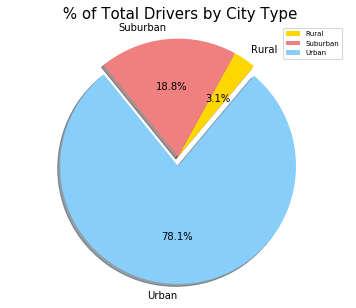

In [857]:
# pie chart based on % of total drivers by city type
plt.title(' % of Total Drivers by City Type', fontsize=15)
plt.legend(loc="upper right", scatterpoints=1, fontsize=7)
plt.axis("equal")
plt.show()